# Liver Cirrohosis Stage Claasification | Logistic Regression | Random Forrest | XGBoost | Accuracy 96% | 

**Author: Aryan**

In [5]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

## EDA

In [21]:
df = pd.read_csv('/kaggle/input/liver-cirrhosis-stage-classification/liver_cirrhosis.csv')
df.head()

,N_Days,Status,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
0,2221,C,Placebo,18499,F,N,Y,N,N,0.5,149.0,4.04,227.0,598.0,52.70,57.0,256.0,9.9,1
1,1230,C,Placebo,19724,M,Y,N,Y,N,0.5,219.0,3.93,22.0,663.0,45.00,75.0,220.0,10.8,2
2,4184,C,Placebo,11839,F,N,N,N,N,0.5,320.0,3.54,51.0,1243.0,122.45,80.0,225.0,10.0,2
3,2090,D,Placebo,16467,F,N,N,N,N,0.7,255.0,3.74,23.0,1024.0,77.50,58.0,151.0,10.2,2
4,2105,D,Placebo,21699,F,N,Y,N,N,1.9,486.0,3.54,74.0,1052.0,108.50,109.0,151.0,11.5,1


In [7]:
df.describe()

,N_Days,Age,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
count,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.00000
mean,1887.117040,18495.877080,3.402644,372.331471,3.486578,100.184663,1995.675597,123.166345,123.822548,256.007337,10.734549,2.00116
std,1091.690918,3737.596616,4.707491,193.668452,0.380488,73.184840,1798.885660,47.747616,52.786350,98.679006,0.904436,0.81387
min,41.000000,9598.000000,0.300000,120.000000,1.960000,4.000000,289.000000,26.350000,33.000000,62.000000,9.000000,1.00000
25%,1080.000000,15694.000000,0.800000,275.000000,3.290000,52.000000,1032.000000,92.000000,92.000000,189.000000,10.000000,1.00000
50%,1680.000000,18499.000000,1.300000,369.510563,3.510000,97.648387,1828.000000,122.556346,124.702128,251.000000,10.600000,2.00000
75%,2576.000000,20955.000000,3.400000,369.510563,3.750000,107.000000,1982.655769,134.850000,127.000000,311.000000,11.100000,3.00000
max,4795.000000,28650.000000,28.000000,1775.000000,4.640000,588.000000,13862.400000,457.250000,598.000000,721.000000,18.000000,3.00000


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   N_Days         25000 non-null  int64  
 1   Status         25000 non-null  object 
 2   Drug           25000 non-null  object 
 3   Age            25000 non-null  int64  
 4   Sex            25000 non-null  object 
 5   Ascites        25000 non-null  object 
 6   Hepatomegaly   25000 non-null  object 
 7   Spiders        25000 non-null  object 
 8   Edema          25000 non-null  object 
 9   Bilirubin      25000 non-null  float64
 10  Cholesterol    25000 non-null  float64
 11  Albumin        25000 non-null  float64
 12  Copper         25000 non-null  float64
 13  Alk_Phos       25000 non-null  float64
 14  SGOT           25000 non-null  float64
 15  Tryglicerides  25000 non-null  float64
 16  Platelets      25000 non-null  float64
 17  Prothrombin    25000 non-null  float64
 18  Stage 

In [8]:
df["Status"].value_counts()

Status
C     13516
D      9456
CL     2028
Name: count, dtype: int64

In [9]:
df["Drug"].value_counts()

Drug
Placebo            15827
D-penicillamine     9173
Name: count, dtype: int64

In [10]:
# Imbalanced Sex ratio
df["Sex"].value_counts()

Sex
F    22137
M     2863
Name: count, dtype: int64

In [11]:
 df["Ascites"].value_counts()

Ascites
N    16798
Y     8202
Name: count, dtype: int64

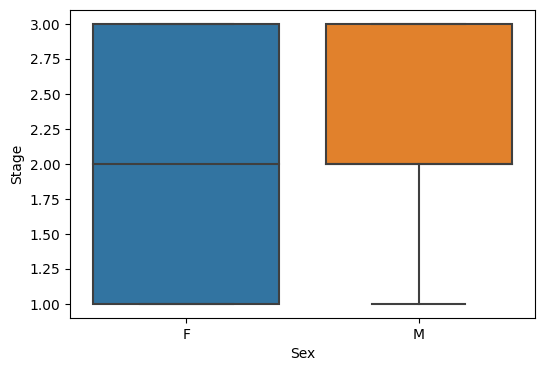

In [13]:
plt.figure(figsize=(6,4))
sns.boxplot(x='Sex',y='Stage',data=df)
plt.show()

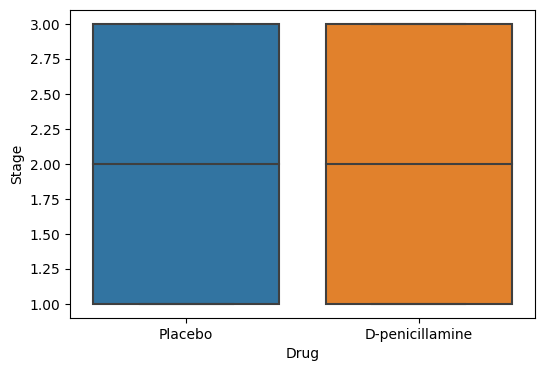

In [14]:
plt.figure(figsize=(6,4))
sns.boxplot(x='Drug',y='Stage',data=df)
plt.show()

In [20]:
df["Stage"].value_counts()

Stage
2    8441
3    8294
1    8265
Name: count, dtype: int64

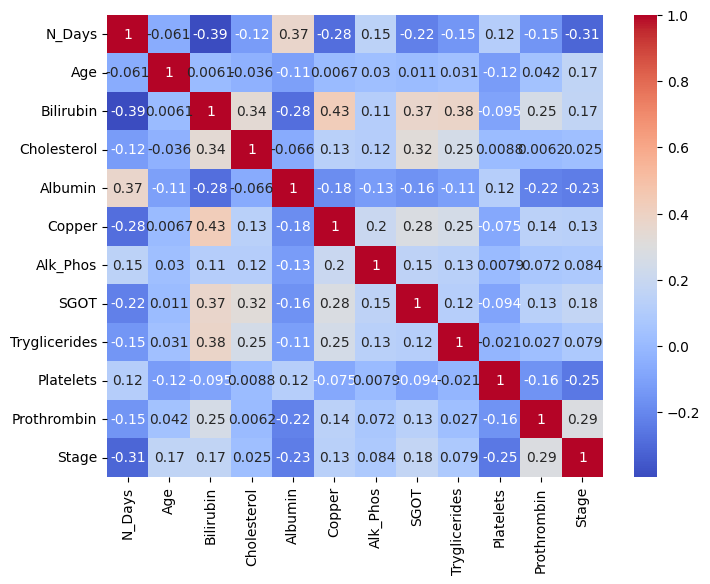

In [24]:
numeric_data = df.select_dtypes(include=[np.number])
corr= numeric_data.corr()

plt.figure(figsize=(8,6))
sns.heatmap(corr,annot=True, cmap='coolwarm')
plt.show()

* One hot encoding for some reason maed my results slightly worse so I manually encoded the values 

## Converting Categorical to Numeric

In [25]:
df['Sex'] = df['Sex'].replace({'F': 1, 'M': 0})
df['Drug'] = df['Drug'].replace({'Placebo': 1, 'D-penicillamine': 0})
df['Ascites'] = df['Ascites'].replace({'Y': 1, 'N': 0})
df['Hepatomegaly'] = df['Hepatomegaly'].replace({'Y': 1, 'N': 0})
df['Spiders'] = df['Spiders'].replace({'Y': 1, 'N': 0})
df['Edema'] = df['Edema'].replace({'Y': 1, 'N': 0,"S":2})
df["Status"]= df["Status"].replace({"C":0,"D":1,"CL":2})

/tmp/ipykernel_33/3514360181.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Sex'] = df['Sex'].replace({'F': 1, 'M': 0})
/tmp/ipykernel_33/3514360181.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Drug'] = df['Drug'].replace({'Placebo': 1, 'D-penicillamine': 0})
/tmp/ipykernel_33/3514360181.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set

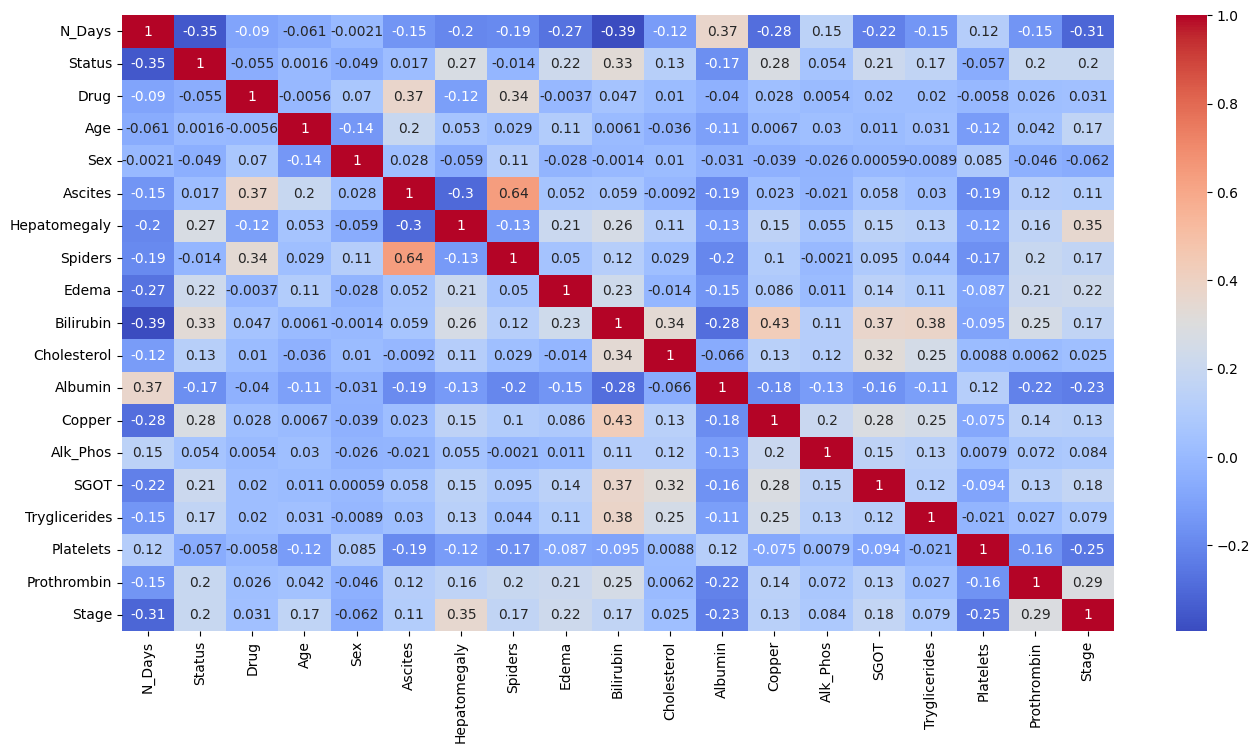

In [27]:
corr = df.corr()

plt.figure(figsize=(16,8))
sns.heatmap(corr,annot=True, cmap='coolwarm')
plt.show()

## Data Splitting

In [28]:
X= df.drop(columns="Stage")
y=df["Stage"]
X.shape, y.shape

((25000, 18), (25000,))

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,shuffle=True,random_state=5)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((20000, 18), (5000, 18), (20000,), (5000,))

## Logistic Regression Model

In [30]:
model_logistic = LogisticRegression(multi_class="multinomial",solver='lbfgs',max_iter=10000)
model_logistic.fit(X_train,y_train)

/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=10000, multi_class='multinomial')

In [35]:
predictions = model_logistic.predict(X_test)

In [36]:
accuracy_score(y_test,predictions)

0.5616

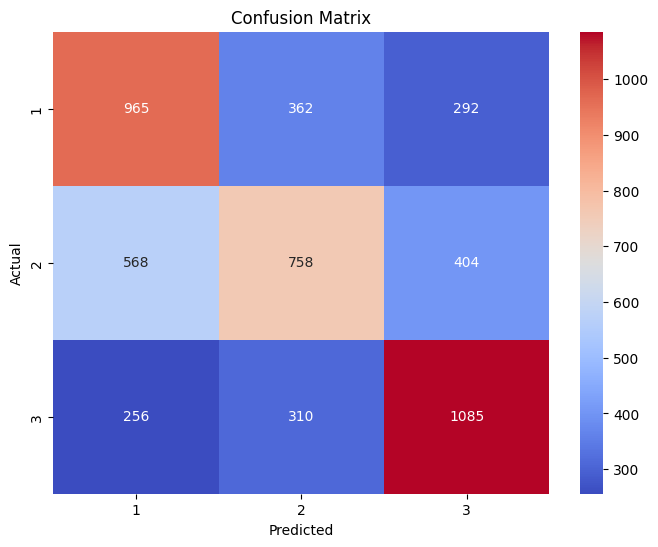

In [37]:
conf_mat = confusion_matrix(y_test, predictions)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='coolwarm', xticklabels=[1, 2, 3], yticklabels=[1, 2, 3])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [38]:
report = classification_report(y_test, predictions)
print(report)

              precision    recall  f1-score   support

           1       0.54      0.60      0.57      1619
           2       0.53      0.44      0.48      1730
           3       0.61      0.66      0.63      1651

    accuracy                           0.56      5000
   macro avg       0.56      0.56      0.56      5000
weighted avg       0.56      0.56      0.56      5000



* Lets see if dropping Ascites helps as there is some correlation of this with Spiders covariate

In [39]:
df=df.drop(labels="Ascites",axis=1)
df.head()

,N_Days,Status,Drug,Age,Sex,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
0,2221,0,1,18499,1,1,0,0,0.5,149.0,4.04,227.0,598.0,52.70,57.0,256.0,9.9,1
1,1230,0,1,19724,0,0,1,0,0.5,219.0,3.93,22.0,663.0,45.00,75.0,220.0,10.8,2
2,4184,0,1,11839,1,0,0,0,0.5,320.0,3.54,51.0,1243.0,122.45,80.0,225.0,10.0,2
3,2090,1,1,16467,1,0,0,0,0.7,255.0,3.74,23.0,1024.0,77.50,58.0,151.0,10.2,2
4,2105,1,1,21699,1,1,0,0,1.9,486.0,3.54,74.0,1052.0,108.50,109.0,151.0,11.5,1


# Data Splitting after dropping Ascites

In [40]:
X_train, X_test,y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=5)
X_train.shape, y_train.shape,X_test.shape, y_test.shape

((20000, 18), (20000,), (5000, 18), (5000,))

In [41]:
model_logistic_2= LogisticRegression(class_weight="balanced",multi_class="multinomial", max_iter=10000)
model_logistic_2.fit(X_train, y_train)
predictions = model_logistic_2.predict(X_test)

/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [42]:
accuracy_score(y_test, predictions)

0.561

In [43]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           1       0.55      0.60      0.57      1619
           2       0.52      0.44      0.48      1730
           3       0.61      0.64      0.62      1651

    accuracy                           0.56      5000
   macro avg       0.56      0.56      0.56      5000
weighted avg       0.56      0.56      0.56      5000



## Random Forest

In [44]:
model_rf = RandomForestClassifier(n_estimators=100, random_state=42)
model_rf.fit(X_train, y_train)
y_pred = model_rf.predict(X_test)

In [45]:
accuracy = accuracy_score(y_test, y_pred)
print(accuracy)

0.9546


In [46]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.95      0.95      0.95      1619
           2       0.95      0.94      0.94      1730
           3       0.97      0.97      0.97      1651

    accuracy                           0.95      5000
   macro avg       0.95      0.95      0.95      5000
weighted avg       0.95      0.95      0.95      5000



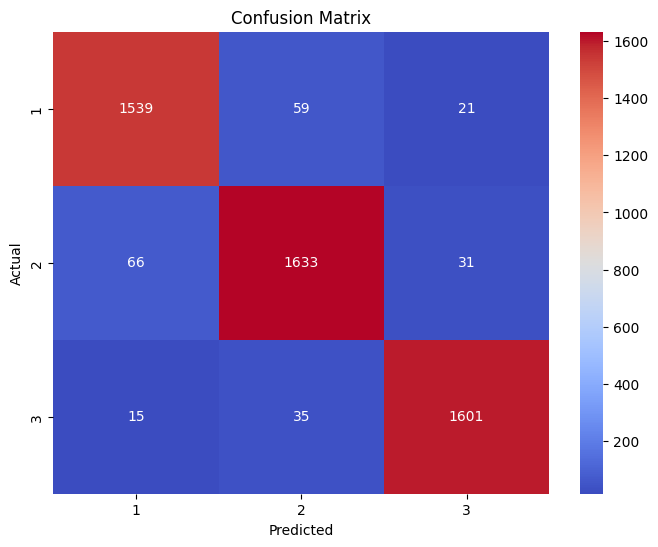

In [47]:
conf_mat = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='coolwarm', xticklabels=[1, 2, 3], yticklabels=[1, 2, 3])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


## XGBoost Model

* XGBoost needs labels staring from 0 so the target variable needs to be changed now

In [50]:
df_xg= df.copy()
df_xg['Stage'] = df['Stage'] - 1

X = df_xg.drop(columns='Stage')
y = df_xg['Stage']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [51]:
model_xgb = XGBClassifier(objective='multi:softmax', num_class=3, random_state=5)
model_xgb.fit(X_train, y_train)



XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None, num_class=3,
              num_parallel_tree=None, ...)

In [55]:
y_pred = model_xgb.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
accuracy

0.9636

In [57]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.95      0.96      1657
           1       0.95      0.97      0.96      1697
           2       0.98      0.97      0.97      1646

    accuracy                           0.96      5000
   macro avg       0.96      0.96      0.96      5000
weighted avg       0.96      0.96      0.96      5000



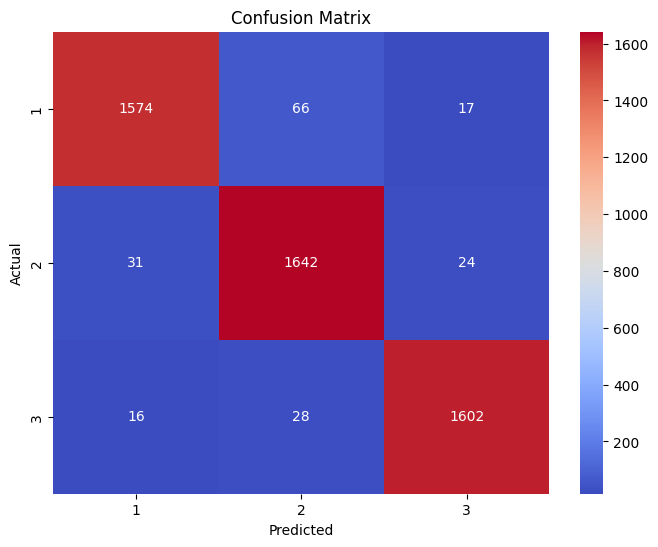

In [58]:
conf_mat = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='coolwarm', xticklabels=[1, 2, 3], yticklabels=[1, 2, 3])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Kindly reach out to me if you have any questions or suggestions